In [122]:
from joblib import load
import pandas as pd
import numpy as np

face_data = load("C:/Users/MaxB2/Documents/Machine_Is_Learning/olivetti_faces_400_64x64.joblib")
X = (-1) * face_data["data"]
y = face_data["target"]

from sklearn.model_selection import StratifiedShuffleSplit

sss1 = StratifiedShuffleSplit(n_splits=10, test_size=(1/5))

for train_index, test_index in sss1.split(X,y):
    X_trainA = X[train_index]
    y_trainA = y[train_index]
    X_test = X[test_index]
    y_test = y[test_index]

# The proportions of the income_cat groups are defined as the following fractions

ydf = pd.Series(y)
ytrdf = pd.Series(y_trainA)
ytsdf = pd.Series(y_test)

total_digit_counts = ydf.value_counts() / len(y)
train_set_value_counts = ytrdf.value_counts()/ len(X_trainA)
test_set_value_counts = ytsdf.value_counts()/ len(X_test)

# Convert the Series object to a DataFrame with appropriate column names
df_comparison = pd.DataFrame({
    "Normal Data Proportion": total_digit_counts.values,
    "Train Set A Proportion":train_set_value_counts.values,
    "Test Set Proportion":test_set_value_counts.values
})
print(df_comparison)


#AUGMENT DATA
X_train_base = X_trainA.copy()
y_train_base = y_trainA.copy()

def augment_data(input_data_list,input_label_list,shift_list): # f(x,y,z)
    from scipy.ndimage import shift
    import pandas as pd
    X_train_augmented_output= list(input_data_list.copy())
    y_train_augmented_output= list(input_label_list.copy())
    for s in range(len(shift_list)):
        for i in range(len(input_data_list)):
            single_image_data = np.array(input_data_list[i])
            shapeX = int(np.sqrt(np.shape(single_image_data)[0]))
            digit_image = np.array(single_image_data.reshape(shapeX,shapeX))
            shifted_pic_AxA = shift(digit_image,shift_list[s],mode='nearest')
            shifted_pic_data = np.array(shifted_pic_AxA.reshape(np.shape(single_image_data)[0],))
            
            X_train_augmented_output.append(shifted_pic_data)
            y_train_augmented_output.append(input_label_list[i])
    return X_train_augmented_output, y_train_augmented_output

sa = 2
desired_shifts = np.array([[0,sa],[0,-sa],[sa,0],[-sa,0]])
X_train_augmented, y_train_augmented = augment_data(X_train_base,y_train_base,desired_shifts)

print("X Shape: ", np.shape(X_train_augmented),"y Shape: ",np.shape(y_train_augmented))

    Normal Data Proportion  Train Set A Proportion  Test Set Proportion
0                    0.025                   0.025                0.025
1                    0.025                   0.025                0.025
2                    0.025                   0.025                0.025
3                    0.025                   0.025                0.025
4                    0.025                   0.025                0.025
5                    0.025                   0.025                0.025
6                    0.025                   0.025                0.025
7                    0.025                   0.025                0.025
8                    0.025                   0.025                0.025
9                    0.025                   0.025                0.025
10                   0.025                   0.025                0.025
11                   0.025                   0.025                0.025
12                   0.025                   0.025              

Original Index:  106  Original Label:  14
New Index:  426  New Label:  14


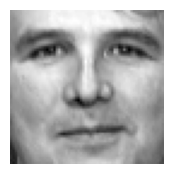

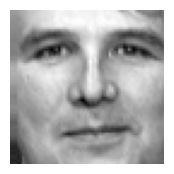

In [123]:
"""Augmented Data Visual Check"""
import matplotlib.pyplot as plt
import random as rd
def plot_pic(Data):
    sq_ps = int(np.sqrt(np.shape(Data)[0]))
    digit_array = Data.reshape(sq_ps,sq_ps)
    plt.figure(figsize=(2, 2))
    plt.imshow(digit_array,cmap="binary")
    plt.axis("off")
    #plt.show()

#original_index = rd.randint(0,X_train_base.shape[0])
original_index = rd.randint(0,X_train_base.shape[0])
new_index = int(original_index)+rd.randint(1,4)*X_train_base.shape[0]

original_image_array = np.array(X_train_augmented[original_index])
original_label = y_train_augmented[original_index]
new_image_array = np.array(X_train_augmented[new_index])
new_label = y_train_augmented[new_index]

print("Original Index: ", original_index," Original Label: ",y_train_augmented[original_index])
plot_pic(original_image_array)
print("New Index: ", new_index," New Label: ",y_train_augmented[new_index])
plot_pic(new_image_array)

In [124]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(0.99)
xs_99 = pca.fit_transform(X_train_augmented)
print("Input: ",np.shape(X_train_augmented))
print("XS_99 shape: ",np.shape(xs_99))
nbs =int(np.ceil(np.sqrt(np.shape(xs_99[1]))))
pca_sqr = PCA(n_components=nbs**2)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_std = ss.fit_transform(X_train_augmented)
X_s = pca_sqr.fit_transform(X_std)
y_s = y_train_augmented.copy()

X_recovered = pca_sqr.inverse_transform(X_s)

print("Output ss: ",np.shape(X_std))
print("Output ss and pca_sqr: ",np.shape(X_s))
print("Recovered: ",np.shape(X_recovered))


Input:  (1600, 4096)
XS_99 shape:  (1600, 636)
Output ss:  (1600, 4096)
Output ss and pca_sqr:  (1600, 676)
Recovered:  (1600, 4096)


In [125]:
import matplotlib.pyplot as plt 
import random as rd
import numpy as np

def plot_digits(X, y):
    indices = rd.sample(range(X.shape[0]), 9)
    fig, axes = plt.subplots(3, 3, figsize=(6, 6))
    for i, ax in enumerate(axes.flat):
        shapeX = int(np.sqrt(np.shape(X[i])[0]))
        image_array = np.array(X[indices[i]])
        digit_array = image_array.reshape(shapeX, shapeX)
        negative_array = (-1) * digit_array  # Compute negative of the image
        #ax.imshow(negative_array, cmap="binary")
        ax.imshow(negative_array, cmap="binary")
        ax.axis("off")
        ax.set_title("Label: {}".format(y[indices[i]]))

    plt.tight_layout()
    plt.show()

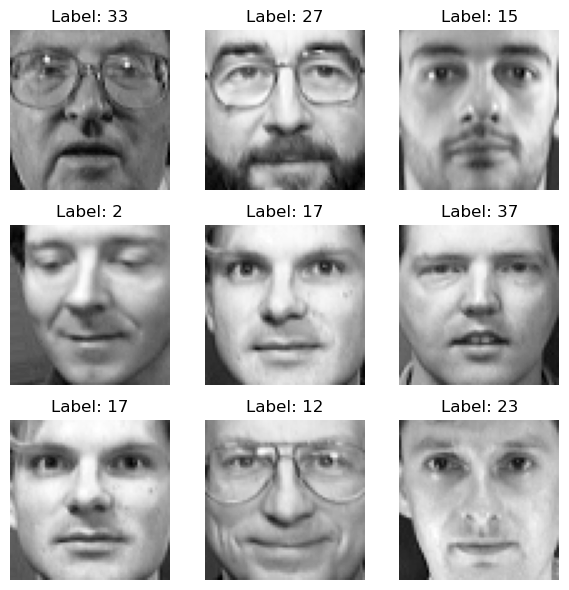

In [126]:
plot_digits((-1) * X, y)

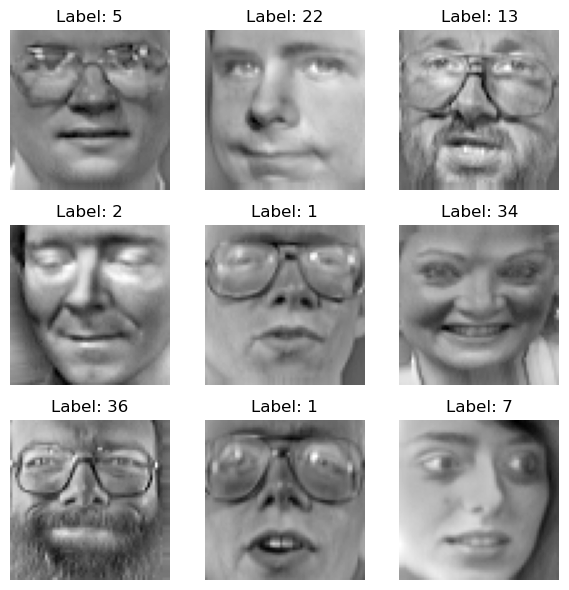

In [127]:
plot_digits((-1) * X_std, y_train_augmented)

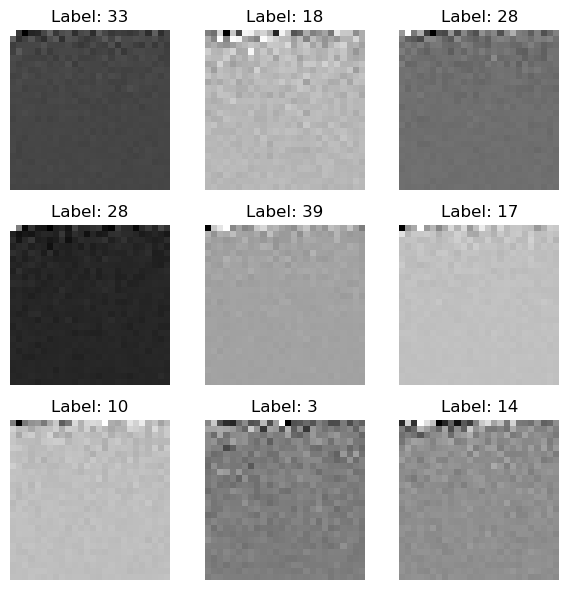

In [128]:
plot_digits(X_s, y_train_augmented)

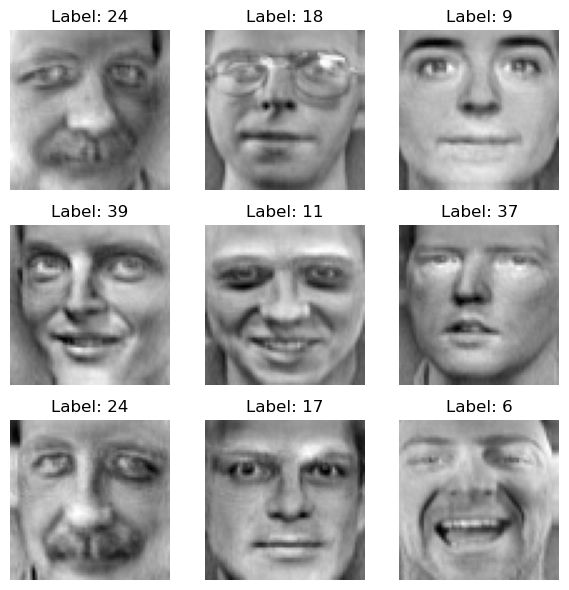

In [129]:
plot_digits((-1) * X_recovered, y_s)

In [130]:
sss2 = StratifiedShuffleSplit(n_splits=10, test_size=(1/4))
y_s = np.array(y_s)
for train_index, val_index in sss2.split(X_s,y_s):  
    X_train = X_s[train_index]
    y_train = y_s[train_index]
    X_val = X_s[val_index]
    y_val = y_s[val_index]

import pandas as pd

ydf1 = pd.Series(y)
yvdf1 = pd.Series(y_val)
ytrdf1 = pd.Series(y_train)
ytsdf1 = pd.Series(y_test)

# The proportions of the income_cat groups are defined as the following fractions
total_digit_counts1 = ydf1.value_counts() / len(y)
strat_validation_value_counts1 = yvdf1.value_counts()/ len(X_val)
train_set_value_counts1 = ytrdf1.value_counts()/ len(X_train)
test_set_value_counts1 = ytsdf1.value_counts()/ len(X_test)

# Convert the Series object to a DataFrame with appropriate column names
df_comparison = pd.DataFrame({
    "Normal Data Proportion": total_digit_counts1.values,
    "Validation Set Proportion": strat_validation_value_counts1.values,
    "Train Set Proportion":train_set_value_counts1.values,
    "Test Set Proportion":test_set_value_counts1.values
})
df_comparison

,Normal Data Proportion,Validation Set Proportion,Train Set Proportion,Test Set Proportion
0,0.025,0.025,0.025,0.025
1,0.025,0.025,0.025,0.025
2,0.025,0.025,0.025,0.025
3,0.025,0.025,0.025,0.025
4,0.025,0.025,0.025,0.025
5,0.025,0.025,0.025,0.025
6,0.025,0.025,0.025,0.025
7,0.025,0.025,0.025,0.025
8,0.025,0.025,0.025,0.025
9,0.025,0.025,0.025,0.025


Epoch 1/200
19/19 [==============================] - 1s 15ms/step - loss: 3.4558 - accuracy: 0.1242 - val_loss: 2.8992 - val_accuracy: 0.3225
Epoch 2/200
19/19 [==============================] - 0s 4ms/step - loss: 2.5046 - accuracy: 0.4533 - val_loss: 2.2045 - val_accuracy: 0.5300
Epoch 3/200
19/19 [==============================] - 0s 4ms/step - loss: 1.8292 - accuracy: 0.6683 - val_loss: 1.6613 - val_accuracy: 0.6775
Epoch 4/200
19/19 [==============================] - 0s 4ms/step - loss: 1.2940 - accuracy: 0.8075 - val_loss: 1.2193 - val_accuracy: 0.8050
Epoch 5/200
19/19 [==============================] - 0s 4ms/step - loss: 0.8968 - accuracy: 0.8867 - val_loss: 0.9246 - val_accuracy: 0.8600
Epoch 6/200
19/19 [==============================] - 0s 4ms/step - loss: 0.6305 - accuracy: 0.9367 - val_loss: 0.7079 - val_accuracy: 0.9000
Epoch 7/200
19/19 [==============================] - 0s 4ms/step - loss: 0.4605 - accuracy: 0.9608 - val_loss: 0.5594 - val_accuracy: 0.9225
Epoch 8/200


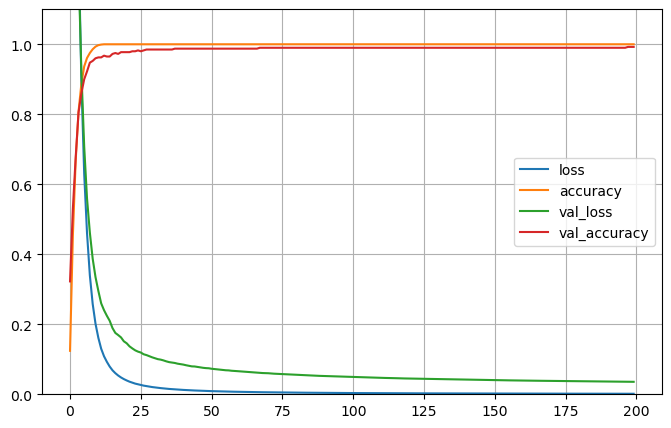

3/3 [==============================] - 0s 2ms/step - loss: 0.0688 - accuracy: 0.9750
Test Accuracy: 0.9750000238418579


In [132]:
import multiprocessing
num_processes = multiprocessing.cpu_count()
from keras.callbacks import EarlyStopping
import keras

nnm = keras.models.Sequential([
    # keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(289,activation="relu"),
    keras.layers.Dense(300,activation="relu"),
    keras.layers.Dense(300,activation="relu"),
    keras.layers.Dense(300,activation="relu"),
    keras.layers.Dense(40,activation="softmax"),
])
early_stopping_cb = EarlyStopping(patience=10,restore_best_weights=True)
nnm.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])
history = nnm.fit(X_train,y_train,epochs=200,batch_size=64,validation_data=(X_val,y_val), callbacks=[early_stopping_cb])
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1.1)
plt.show()
X_test_std = ss.transform(X_test)
X_conv = pca_sqr.transform(X_test_std)
loss, accuracy = nnm.evaluate(X_conv, y_test)
print("Test Accuracy:" ,accuracy)

3/3 [==============================] - 0s 1ms/step
Pred Label:  5
True Label:  5


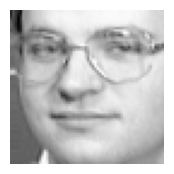

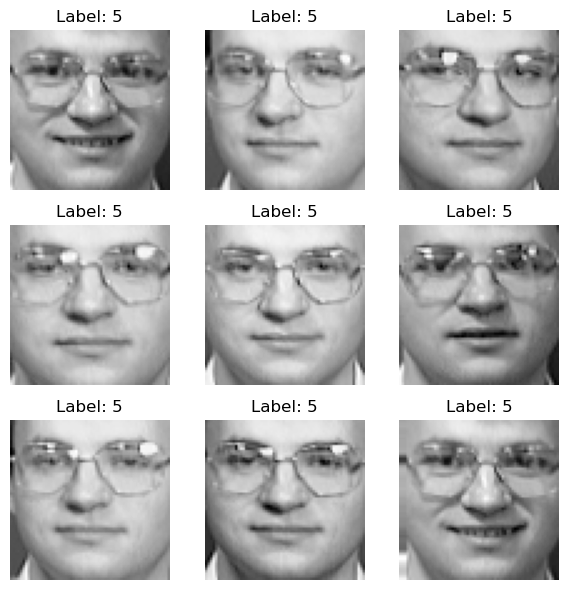

In [139]:
y_pred = nnm.predict(X_conv)
y_pred[0]
np.argmax(y_pred[0]) # label prediction

def plot_samples(X, y, target_label):
    indices = [i for i in range(len(X)) if y[i] == target_label]
    if len(indices) < 9:
        print("Not enough images with the specified label.")
        return
    
    indices = indices[:9]  # Take the first 9 indices
    
    fig, axes = plt.subplots(3, 3, figsize=(6, 6))
    for i, ax in enumerate(axes.flat):
        shapeX = int(np.sqrt(np.shape(X[indices[i]])[0]))
        image_array = np.array(X[indices[i]])
        digit_array = image_array.reshape(shapeX, shapeX)
        negative_array = digit_array  # Compute negative of the image
        ax.imshow(negative_array, cmap="binary")
        ax.axis("off")
        ax.set_title(f"Label: {target_label}".format(y[indices[i]]))

    plt.tight_layout()
    plt.show()

Ipi = rd.randint(0,y_pred.shape[0])
pred_label = np.argmax(y_pred[Ipi])

p_i = X_test[Ipi]
p_l = y_pred[Ipi]

print("Pred Label: ", pred_label)
print("True Label: ", y_test[Ipi])
plot_pic(p_i)
plot_samples(X_train_augmented, y_train_augmented, pred_label)

c:\Users\MaxB2\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\MaxB2\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\MaxB2\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\MaxB2\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

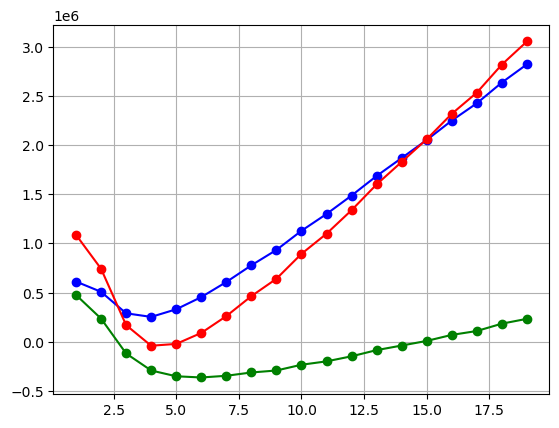

In [87]:
from sklearn.mixture import GaussianMixture

range_1 = range(1,20,1)

from sklearn.decomposition import PCA
pca = PCA(0.99)
X_99 = pca.fit_transform(X_std)

bics = np.array([])
aics = np.array([])

for k in range_1:
    gmix = GaussianMixture(n_components=k, n_init=5)
    gmix.fit(X_99)
    bics = np.append(bics, gmix.bic(X_99))
    aics = np.append(aics, gmix.aic(X_99))

b_and_a_ics = bics + aics

plt.plot(range_1,bics,"bo-")
plt.plot(range_1,aics,"go-")
plt.plot(range_1,b_and_a_ics,"ro-")
plt.grid(True)
#plt.gca().set_ylim(0,1.1)
plt.show()



In [90]:
bics

array([ 612244.17582723,  507635.16152839,  288814.49614959,
        252145.16087235,  329649.81651318,  453862.02245468,
        607651.95176077,  777779.20628748,  934413.60465971,
       1129521.58458764, 1300388.34377998, 1488524.31231754,
       1687932.68345596, 1871037.83605013, 2054619.75133098,
       2252383.4140728 , 2428463.82950576, 2639864.63766646,
       2825487.1628848 ])

In [ ]:
bics

array([ 612244.17582723,  507635.16152839,  288814.49614959,
        252145.16087235,  329649.81651318,  453862.02245468,
        607651.95176077,  777779.20628748,  934413.60465971,
       1129521.58458764, 1300388.34377998, 1488524.31231754,
       1687932.68345596, 1871037.83605013, 2054619.75133098,
       2252383.4140728 , 2428463.82950576, 2639864.63766646,
       2825487.1628848 ])